<a href="https://colab.research.google.com/github/kumarprakhar14/Gen_AI/blob/master/notebooks/unit-1-intro-to-genai/08-first-autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎨 Welcome to UNIT I: Generative AI!
## The Paradigm Shift
**What you've been doing (Discriminative Models):**
```bash
Input: Image of digit
Output: "This is a 7" (classification)

Question: "What is this?"
```

**What we're about to do (Generative Models):**
```bash
Input: Random noise / latent code
Output: Brand new image of digit

Question: "Can you create this?"
```

## Today's Mission: Your First Generative Model
We're building an Autoencoder - the gateway to generative AI!
```bash
Autoencoder:
Input Image → Encoder → Compressed Code → Decoder → Reconstructed Image

Goal: Make output look like input!
Magic: The "compressed code" learns meaningful representations
```

## 🎯 Today's Plan (1.5 hours)
### Part 1: Theory - Generative vs Discriminative (30 min)
- What makes a model "generative"?
- Latent spaces (the secret sauce!)
- Why autoencoders are cool

### Part 2: Build Your First Autoencoder (60 min)
- Code-first approach
- Encoder: Compress 28×28 → 32 dimensions
- Decoder: Decompress 32 → 28×28
- Train and see reconstructions!

### 📚 Part 1: Generative vs Discriminative (20-25 min)
[Read the doc](../../docs/Introduction-to-GenAI.md)

### 🚀 Part 2: Build Your First Autoencoder!
Challenge Mode Activated! Let's compress and reconstruct MNIST digits! 🎨

**Quick Reference Card**
```py
# Data preprocessing
x.reshape(-1, 784)  # Flatten (28,28) → (784,)
x.astype('float32') / 255.0  # Normalize

# Autoencoder architecture
keras.Sequential([
    # Encoder (compress)
    Dense(256, activation='relu', input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(32, activation='relu'),  # ← Bottleneck (latent!)
    
    # Decoder (expand)
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(784, activation='sigmoid'),  # ← Output [0,1]
])

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy')

# Train (KEY: input = target!)
model.fit(x_train, x_train, epochs=10, batch_size=256,
          validation_data=(x_test, x_test))
```

### 🔍 What to Watch For

1. Training loss should decrease steadily

- Epoch 1: ~0.15-0.20
- Epoch 10: ~0.09-0.10


2. Reconstructions will be slightly blurry (normal!)

- Not pixel-perfect
- But clearly recognizable


3. Different from CNN:

- No labels needed!
- Input = Output
- Loss is reconstruction error, not classification error

In [1]:
"""
AUTOENCODER CHALLENGE: Build Your First Generative Model!

Goal: Compress MNIST digits from 784 → 32 dimensions → 784 pixels
      Watch the magic of reconstruction!

Architecture:
Input (784) → Dense(256) → Dense(128) → Dense(32) → Dense(128) → Dense(256) → Output(784)
              ↑________ENCODER________↑  LATENT  ↑_________DECODER________↑

Your job: Fill in the TODOs!
"""

'\nAUTOENCODER CHALLENGE: Build Your First Generative Model!\n\nGoal: Compress MNIST digits from 784 → 32 dimensions → 784 pixels\n      Watch the magic of reconstruction!\n\nArchitecture:\nInput (784) → Dense(256) → Dense(128) → Dense(32) → Dense(128) → Dense(256) → Output(784)\n              ↑________ENCODER________↑  LATENT  ↑_________DECODER________↑\n\nYour job: Fill in the TODOs!\n'

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.19.0


In [3]:
# ============================================
# PART 1: LOAD & PREPROCESS DATA
# ============================================

In [4]:
print("\n" + "="*60)
print("Loading MNIST Dataset")
print("="*60)


Loading MNIST Dataset


In [12]:
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()

print(f"Training samples: {len(x_train)}")
print(f"Test samples: {len(x_test)}")
print(f"Image shape: {x_train[0].shape}")

Training samples: 60000
Test samples: 10000
Image shape: (28, 28)


#### TODO 1: PREPROCESS FOR AUTOENCODER


In [6]:
"""
Unlike CNNs, autoencoders typically use FLATTENED input:
- Flatten: (28, 28) → (784,)
- Normalize: [0, 255] → [0, 1]

Note: No labels needed! Autoencoders are self-supervised!
      Input = Output (reconstruction task)
"""

'\nUnlike CNNs, autoencoders typically use FLATTENED input:\n- Flatten: (28, 28) → (784,)\n- Normalize: [0, 255] → [0, 1]\n\nNote: No labels needed! Autoencoders are self-supervised!\n      Input = Output (reconstruction task)\n'

In [14]:
# TODO: Flatten images
x_train = tf.reshape(x_train, shape=(60000, 784,))  # YOUR CODE - Shape should be (60000, 784)
x_test =  tf.reshape(x_test, shape=(10000, 784,))  # YOUR CODE - Shape should be (10000, 784)

# TODO: Normalize to [0, 1]
x_train = tf.cast(x_train, dtype='float32') / 255.0  # YOUR CODE
x_test = tf.cast(x_test, dtype='float32') / 255.0   # YOUR CODE

In [18]:
print(f"\n✓ x_train shape: {x_train.shape}")  # Should be (60000, 784)
print(f"✓ x_test shape: {x_test.shape}")      # Should be (10000, 784)
print(f"✓ Pixel range: [{tf.reduce_min(x_train)}, {tf.reduce_max(x_train)}]")  # Should be [0.0, 1.0]


✓ x_train shape: (60000, 784)
✓ x_test shape: (10000, 784)
✓ Pixel range: [0.0, 1.0]


In [19]:
# ============================================
# TODO 2: BUILD AUTOENCODER ARCHITECTURE
# ============================================

In [20]:
print("\n" + "="*60)
print("🎯 CHALLENGE: Build Your Autoencoder!")
print("="*60)


🎯 CHALLENGE: Build Your Autoencoder!


In [21]:
"""
Architecture:

INPUT (784)
    ↓
ENCODER:
    Dense(256, activation='relu')
    Dense(128, activation='relu')
    Dense(32, activation='relu')  ← BOTTLENECK (latent space!)
    ↓
DECODER:
    Dense(128, activation='relu')
    Dense(256, activation='relu')
    Dense(784, activation='sigmoid')  ← Output (sigmoid for [0,1] range)
    ↓
OUTPUT (784)

Key points:
1. Encoder compresses: 784 → 256 → 128 → 32
2. Latent dimension: 32 (compressed representation)
3. Decoder expands: 32 → 128 → 256 → 784
4. Final activation: sigmoid (output should be [0, 1] like input)
5. Symmetric architecture (encoder mirrors decoder)
"""

"\nArchitecture:\n\nINPUT (784)\n    ↓\nENCODER:\n    Dense(256, activation='relu')\n    Dense(128, activation='relu')\n    Dense(32, activation='relu')  ← BOTTLENECK (latent space!)\n    ↓\nDECODER:\n    Dense(128, activation='relu')\n    Dense(256, activation='relu')\n    Dense(784, activation='sigmoid')  ← Output (sigmoid for [0,1] range)\n    ↓\nOUTPUT (784)\n\nKey points:\n1. Encoder compresses: 784 → 256 → 128 → 32\n2. Latent dimension: 32 (compressed representation)\n3. Decoder expands: 32 → 128 → 256 → 784\n4. Final activation: sigmoid (output should be [0, 1] like input)\n5. Symmetric architecture (encoder mirrors decoder)\n"

In [22]:
# TODO: Build the autoencoder
autoencoder = keras.Sequential([
    # ENCODER
    # TODO: Add Dense layers to compress input
    keras.layers.Dense(256, input_shape=(784,), activation='relu'),  # YOUR CODE: Dense(256, activation='relu', input_shape=(784,))
    keras.layers.Dense(128, activation='relu'),  # YOUR CODE: Dense(128, activation='relu')
    keras.layers.Dense(32, input_shape=(784,), activation='relu'),  # YOUR CODE: Dense(32, activation='relu')  ← Bottleneck!

    # DECODER
    # TODO: Add Dense layers to reconstruct output
    keras.layers.Dense(128, activation='relu'),  # YOUR CODE: Dense(128, activation='relu')
    keras.layers.Dense(256, activation='relu'),  # YOUR CODE: Dense(256, activation='relu')
    keras.layers.Dense(784, activation='sigmoid'),  # YOUR CODE: Dense(784, activation='sigmoid')  ← Output!
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
print("\n🏗️  Autoencoder Architecture:")
autoencoder.summary()


🏗️  Autoencoder Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 784)            │       201,488 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 476,720 (1.82 MB)

 Trainable params: 476,720 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# ============================================
# TODO 3: COMPILE MODEL
# ============================================

In [25]:
print("\n" + "="*60)
print("Compiling Autoencoder")
print("="*60)


Compiling Autoencoder


In [26]:

"""
Key differences from classification:

Loss function:
- Classification: categorical_crossentropy
- Autoencoder: binary_crossentropy OR mean_squared_error
  (We want: output pixels ≈ input pixels)

Why binary_crossentropy?
- Pixels are [0, 1] (like probabilities)
- Measures reconstruction quality pixel-by-pixel

Optimizer:
- Adam (as usual, works great!)

Metrics:
- Not accuracy! (We're not classifying)
- Can track loss only, or add custom metrics
"""

"\nKey differences from classification:\n\nLoss function:\n- Classification: categorical_crossentropy\n- Autoencoder: binary_crossentropy OR mean_squared_error\n  (We want: output pixels ≈ input pixels)\n\nWhy binary_crossentropy?\n- Pixels are [0, 1] (like probabilities)\n- Measures reconstruction quality pixel-by-pixel\n\nOptimizer:\n- Adam (as usual, works great!)\n\nMetrics:\n- Not accuracy! (We're not classifying)\n- Can track loss only, or add custom metrics\n"

In [27]:
# TODO: Compile the autoencoder
# Use: optimizer='adam', loss='binary_crossentropy'

# YOUR CODE HERE
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

print("✓ Autoencoder compiled!")

✓ Autoencoder compiled!


In [28]:
# ============================================
# TODO 4: TRAIN AUTOENCODER
# ============================================

In [29]:
print("\n" + "="*60)
print("🚀 Training Autoencoder")
print("="*60)


🚀 Training Autoencoder


In [30]:
"""
Key insight for training:
In classification:  model.fit(x_train, y_train, ...)
In autoencoder:     model.fit(x_train, x_train, ...)
                                 ↑       ↑
                              Input  Target (same!)

We want: output = input (reconstruction task)
"""

'\nKey insight for training:\nIn classification:  model.fit(x_train, y_train, ...)\nIn autoencoder:     model.fit(x_train, x_train, ...)\n                                 ↑       ↑\n                              Input  Target (same!)\n\nWe want: output = input (reconstruction task)\n'

In [32]:
# TODO: Train the autoencoder
# Remember: Both input AND output are x_train!
# Use: epochs=10, batch_size=256, validation_data=(x_test, x_test)

# YOUR CODE HERE
history = autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, validation_data=(x_test, x_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - loss: 0.3109 - val_loss: 0.1457
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.1378 - val_loss: 0.1185
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1169 - val_loss: 0.1078
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.1078 - val_loss: 0.1028
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1028 - val_loss: 0.0992
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - loss: 0.0994 - val_loss: 0.0960
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.0967 - val_loss: 0.0943
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0944 - val_loss: 0.0926
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 0.0929 - val_loss: 0.0909
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.0916 - val_loss: 0.0898


In [33]:
print("""
Expected Results:
Epoch 1: loss ~0.15-0.20 (learning to reconstruct)
Epoch 10: loss ~0.09-0.10 (good reconstructions!)

Note: Loss around 0.10 means ~10% pixel error on average
      This is actually pretty good for 784 → 32 → 784!
""")


Expected Results:
Epoch 1: loss ~0.15-0.20 (learning to reconstruct)
Epoch 10: loss ~0.09-0.10 (good reconstructions!)

Note: Loss around 0.10 means ~10% pixel error on average
      This is actually pretty good for 784 → 32 → 784!



In [34]:
# ============================================
# TODO 5: VISUALIZE RECONSTRUCTIONS
# ============================================

In [35]:
print("\n" + "="*60)
print("🎨 Visualizing Reconstructions")
print("="*60)


🎨 Visualizing Reconstructions


In [37]:
# Get reconstructions
reconstructed = autoencoder.predict(x_test[:10], verbose=0)

✓ Saved to 'autoencoder_reconstructions.png'


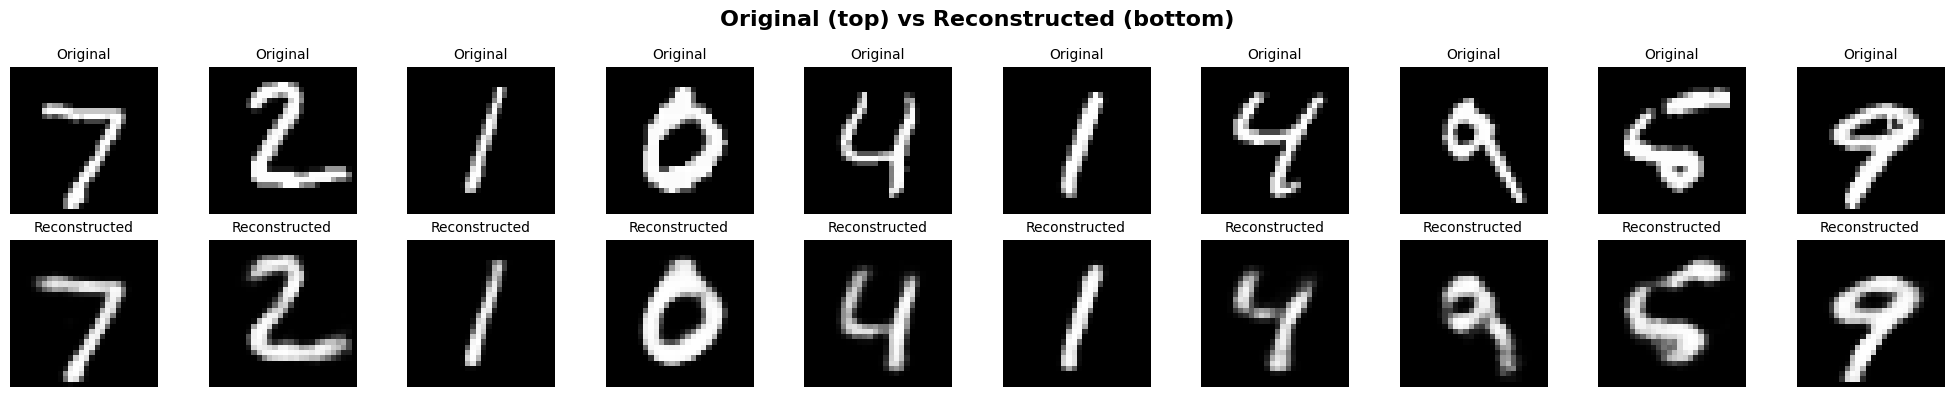

In [39]:
# Visualize original vs reconstructed
fig, axes = plt.subplots(2, 10, figsize=(20, 4))
fig.suptitle('Original (top) vs Reconstructed (bottom)', fontsize=16, fontweight='bold')

for i in range(10):
    # Original
    axes[0, i].imshow(tf.reshape(x_test[i], shape=(28, 28)), cmap='gray')
    axes[0, i].set_title(f'Original', fontsize=10)
    axes[0, i].axis('off')

    # Reconstructed
    axes[1, i].imshow(reconstructed[i].reshape(28, 28), cmap='gray')
    axes[1, i].set_title(f'Reconstructed', fontsize=10)
    axes[1, i].axis('off')

plt.tight_layout()
plt.savefig('autoencoder_reconstructions.png', dpi=150, bbox_inches='tight')
print("✓ Saved to 'autoencoder_reconstructions.png'")
plt.show()
plt.close()

In [40]:
# ============================================
# PART 6: EXTRACT ENCODER & DECODER
# ============================================

In [41]:
print("\n" + "="*60)
print("🔧 Extracting Encoder & Decoder")
print("="*60)


🔧 Extracting Encoder & Decoder


In [42]:
"""
Cool trick: We can split the autoencoder!

Encoder: Input → Latent code (784 → 32)
Decoder: Latent code → Output (32 → 784)

This lets us:
1. Encode images to latent space
2. Decode latent codes to images
3. Do operations in latent space!
"""

'\nCool trick: We can split the autoencoder!\n\nEncoder: Input → Latent code (784 → 32)\nDecoder: Latent code → Output (32 → 784)\n\nThis lets us:\n1. Encode images to latent space\n2. Decode latent codes to images\n3. Do operations in latent space!\n'

In [44]:
# Create encoder model (first 3 layers)
encoder = keras.Sequential([
    autoencoder.layers[0],  # Dense(256)
    autoencoder.layers[1],  # Dense(128)
    autoencoder.layers[2],  # Dense(32) ← Latent!
])


# Create decoder model (last 3 layers)
decoder = keras.Sequential([
    autoencoder.layers[3],  # Dense(128)
    autoencoder.layers[4],  # Dense(256)
    autoencoder.layers[5],  # Dense(784)
])

print("✓ Encoder extracted (input → latent)")
print("✓ Decoder extracted (latent → output)")


✓ Encoder extracted (input → latent)
✓ Decoder extracted (latent → output)


In [45]:
# Encode a digit
sample_image = x_test[0:1]  # Keep batch dimension
latent_code = encoder.predict(sample_image, verbose=0)
print(f"\n✓ Original image shape: {sample_image.shape}")
print(f"✓ Latent code shape: {latent_code.shape}")
print(f"✓ Compression: 784 → 32 ({(1 - 32/784)*100:.1f}% smaller!)")


✓ Original image shape: (1, 784)
✓ Latent code shape: (1, 32)
✓ Compression: 784 → 32 (95.9% smaller!)


In [46]:
# Decode back
reconstructed = decoder.predict(latent_code, verbose=0)
print(f"✓ Reconstructed shape: {reconstructed.shape}")

✓ Reconstructed shape: (1, 784)


In [47]:
# ============================================
# PART 7: VISUALIZE LATENT SPACE
# ============================================

In [48]:
print("\n" + "="*60)
print("🗺️  Visualizing Latent Space")
print("="*60)


🗺️  Visualizing Latent Space


In [49]:
"""
We can visualize the 32D latent space using t-SNE or PCA!
This shows how similar digits cluster together.
"""

'\nWe can visualize the 32D latent space using t-SNE or PCA!\nThis shows how similar digits cluster together.\n'

In [50]:
from sklearn.manifold import TSNE
from tensorflow.keras.datasets import mnist

# Load labels for coloring
(_, y_train_labels), (_, y_test_labels) = mnist.load_data()

In [51]:
# Encode test images
latent_codes = encoder.predict(x_test[:1000], verbose=0)  # Use 1000 sample

In [52]:
# Reduce to 2D using t-SNE
print("Computing t-SNE... (this takes ~30 seconds)")
tsne = TSNE(n_components=2, random_state=42)
latent_2d = tsne.fit_transform(latent_codes)

Computing t-SNE... (this takes ~30 seconds)


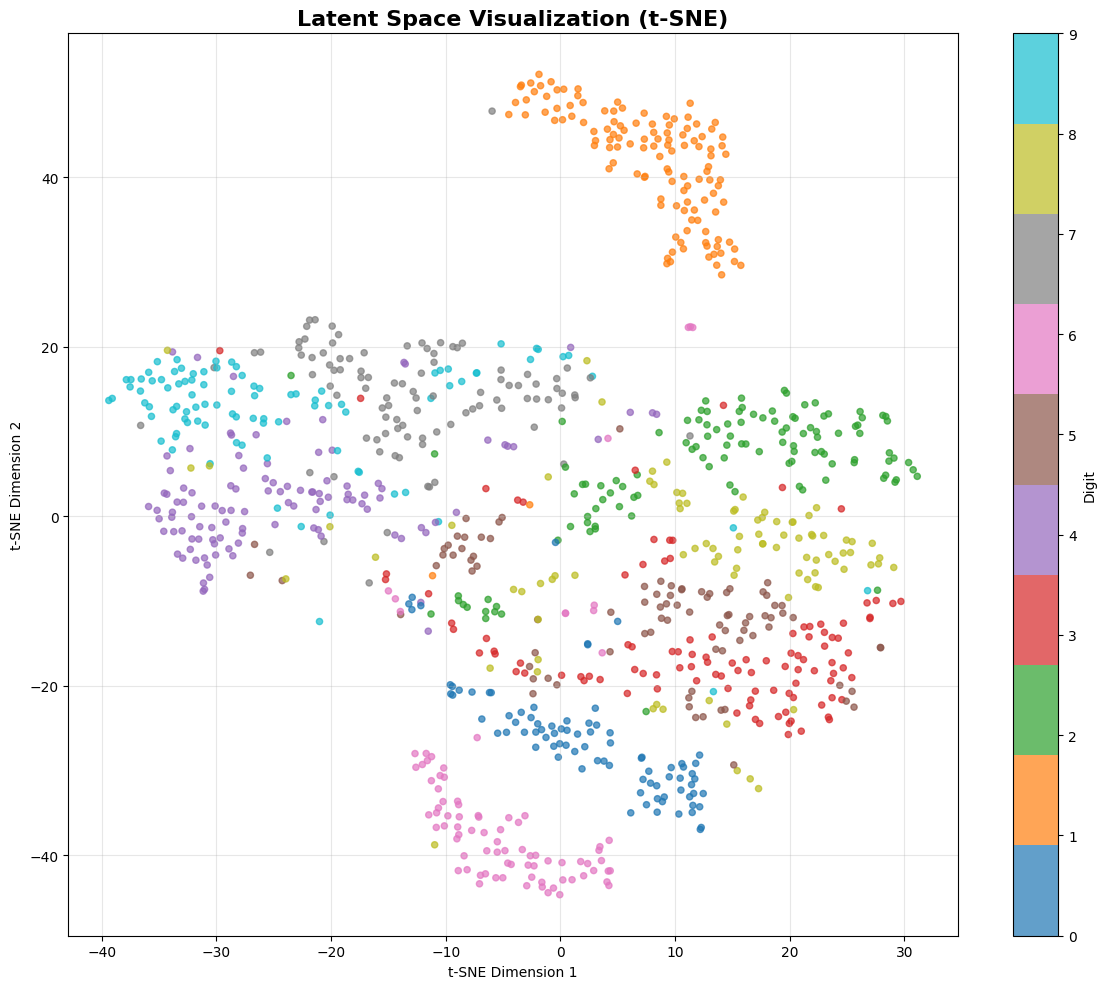

✓ Saved to 'autoencoder_latent_space.png'


In [54]:
# Plot
plt.figure(figsize=(12, 10))
scatter = plt.scatter(latent_2d[:, 0], latent_2d[:, 1],
                      c=y_test_labels[:1000], cmap='tab10',
                      alpha=0.7, s=20)
plt.colorbar(scatter, label='Digit')
plt.title('Latent Space Visualization (t-SNE)', fontsize=16, fontweight='bold')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('autoencoder_latent_space.png', dpi=150, bbox_inches='tight')
plt.show()
print("✓ Saved to 'autoencoder_latent_space.png'")
plt.close()

In [55]:
# ============================================
# PART 8: COMPARE DIFFERENT LATENT SIZES
# ============================================

In [56]:
print("\n" + "="*60)
print("🔬 Experiment: Different Latent Dimensions")
print("="*60)


🔬 Experiment: Different Latent Dimensions


In [57]:
print("""
Try building autoencoders with different bottleneck sizes:

Latent dim = 8:   Very compressed, loses details
Latent dim = 16:  Good balance
Latent dim = 32:  Better quality (what we used)
Latent dim = 64:  High quality, less compression
Latent dim = 128: Almost perfect, but defeats the purpose!

Trade-off: Compression vs Quality
""")


Try building autoencoders with different bottleneck sizes:

Latent dim = 8:   Very compressed, loses details
Latent dim = 16:  Good balance
Latent dim = 32:  Better quality (what we used)
Latent dim = 64:  High quality, less compression
Latent dim = 128: Almost perfect, but defeats the purpose!

Trade-off: Compression vs Quality



In [58]:
# ============================================
# DEBUGGING HELPER
# ============================================

In [59]:
print("\n" + "="*60)
print("🛠️  DEBUGGING TIPS")
print("="*60)


🛠️  DEBUGGING TIPS


In [60]:
print("""
Common Issues & Solutions:

1. "None has no attribute" error:
   → You have None in your model layers!
   → Replace with actual Dense layers

2. Loss doesn't decrease:
   → Check if data is normalized (x / 255.0)
   → Verify loss function (binary_crossentropy)
   → Make sure final activation is sigmoid

3. Poor reconstructions:
   → Train longer (more epochs)
   → Try different latent dimensions
   → Check if model is too shallow (add more layers)

4. "Target shape mismatch":
   → Remember: model.fit(x_train, x_train, ...)
   → Both input and target are the same!


5. Reconstructions are blurry:
   → This is NORMAL for autoencoders!
   → VAEs will be better (coming next!)
   → Try larger latent dimension

Expected shapes:
- Input: (batch_size, 784)
- After encoder: (batch_size, 32)
- After decoder: (batch_size, 784)
- Output: (batch_size, 784) ← Should match input!
""")


Common Issues & Solutions:

1. "None has no attribute" error:
   → You have None in your model layers!
   → Replace with actual Dense layers

2. Loss doesn't decrease:
   → Check if data is normalized (x / 255.0)
   → Verify loss function (binary_crossentropy)
   → Make sure final activation is sigmoid

3. Poor reconstructions:
   → Train longer (more epochs)
   → Try different latent dimensions
   → Check if model is too shallow (add more layers)

4. "Target shape mismatch":
   → Remember: model.fit(x_train, x_train, ...)
   → Both input and target are the same!

   
5. Reconstructions are blurry:
   → This is NORMAL for autoencoders!
   → VAEs will be better (coming next!)
   → Try larger latent dimension

Expected shapes:
- Input: (batch_size, 784)
- After encoder: (batch_size, 32)
- After decoder: (batch_size, 784)
- Output: (batch_size, 784) ← Should match input!



In [61]:
# ============================================
# KNOWLEDGE CHECK
# ============================================

In [62]:
print("\n" + "="*60)
print("💡 KNOWLEDGE CHECK")
print("="*60)


💡 KNOWLEDGE CHECK


In [63]:
print("""
Before looking at solutions, make sure you understand:

1. Why do we use x_train as BOTH input and target?
   → Reconstruction task: output should equal input

2. Why sigmoid activation on output layer?
   → Pixels are [0, 1], sigmoid outputs [0, 1]

3. Why is this called "self-supervised"?
   → No labels needed! Input is the supervision signal

4. What does the latent code represent?
   → Compressed, meaningful representation of the image

5. Why 32 dimensions for latent space?
   → Trade-off: Too small = information loss
                Too large = no compression, overfitting

6. Can we generate new images with this?
   → Not reliably! Random latent codes → garbage
   → VAEs fix this (coming next!)

7. What's the difference from classification?
   → Classification: Input → Label
   → Autoencoder: Input → Reconstruction of input

Ready to complete the challenge? Go! 🚀
""")


Before looking at solutions, make sure you understand:

1. Why do we use x_train as BOTH input and target?
   → Reconstruction task: output should equal input

2. Why sigmoid activation on output layer?
   → Pixels are [0, 1], sigmoid outputs [0, 1]

3. Why is this called "self-supervised"?
   → No labels needed! Input is the supervision signal

4. What does the latent code represent?
   → Compressed, meaningful representation of the image

5. Why 32 dimensions for latent space?
   → Trade-off: Too small = information loss
                Too large = no compression, overfitting

6. Can we generate new images with this?
   → Not reliably! Random latent codes → garbage
   → VAEs fix this (coming next!)

7. What's the difference from classification?
   → Classification: Input → Label
   → Autoencoder: Input → Reconstruction of input

Ready to complete the challenge? Go! 🚀



In [65]:
print("\n" + "="*60)
print("✨ YOUR TURN!")
print("="*60)


✨ YOUR TURN!


In [66]:
print("\n" + "="*60)
print("✨ YOUR TURN!")
print("="*60)
print("""
Step-by-step:
1. Fill in TODO 1 (Data preprocessing)
2. Fill in TODO 2 (Model architecture)
3. Fill in TODO 3 (Compile)
4. Fill in TODO 4 (Train)
5. Uncomment visualization code

Expected time: 45-60 minutes
Expected loss: ~0.09-0.10

Good luck! 💪
""")


✨ YOUR TURN!

Step-by-step:
1. Fill in TODO 1 (Data preprocessing)
2. Fill in TODO 2 (Model architecture)
3. Fill in TODO 3 (Compile)
4. Fill in TODO 4 (Train)
5. Uncomment visualization code

Expected time: 45-60 minutes
Expected loss: ~0.09-0.10

Good luck! 💪

